# Modelling a Distillation Process Using Machine Learning

Richard Kaldenhoven

**Executive Summary**

## 1. Introduction



## 2. Problem Definition



## 3. Measure of Success



## 4. Evaluation Protocol



## 5. Data Generation



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02):
    
    xFh = 1 - xFp
    xDh = 1 - xDp
    xBh = 1 - xBp
    
    Hvap_B = (xBp * 25.77 + xBh * 28.85) * 1000
    
    D = F * ((xFp - (xFh * xBp / xBh)) / (xDp - (xDp * xBp / xBh)))    
    QR = 2.5 * D * Hvap_B / 3600    
    ns = (QR / (Hvap_s * Ms)) * 3600
    
    return D, QR, ns

In [3]:
F = 100
xFp = 0.45

D, QR, ns = calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02)

print('F = ' + str(round(F, 1)) + ' kmol/h')
print('xFp = ' + str(round(xFp, 2)))
print('D = ' + str(round(D, 1)) + ' kmol/h')
print('Reboiler Duty QR = ' + str(round(QR, 1)) + ' kW')
print('Reboiler Steam Flowrate = ' + str(round(ns, 1)) + ' kmol/h')

F = 100 kmol/h
xFp = 0.45
D = 45.7 kmol/h
Reboiler Duty QR = 913.7 kW
Reboiler Steam Flowrate = 80.9 kmol/h


In [4]:
def gen_rand_num(low, high):
    
    return float(np.random.uniform(low, high, 1))

In [5]:
def generate_data(num_samples, low_feed_lim, high_feed_lim, low_comp_lim, high_comp_lim):
    
    sample_list = []

    for i in range(0, num_samples):
        # vary feed rate
        base_F = 100       
        low_feed = base_F * low_feed_lim        
        high_feed = base_F * high_feed_lim
        F = gen_rand_num(low_feed, high_feed)

        # vary feed composition
        base_xFp = 0.45        
        low_comp = base_xFp * low_comp_lim
        high_comp = base_xFp * high_comp_lim
        xFp = gen_rand_num(low_comp, high_comp)

        D, QR, ns = calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02)
        
        sample_list.append([F, xFp, D, QR, ns])
        
        data = np.asarray(sample_list)
        
    return data

In [6]:
num_samples = 1000
low_feed_lim = 0.9
high_feed_lim = 1.1
low_comp_lim = 0.9
high_comp_lim = 1.1

data = generate_data(num_samples, low_feed_lim, high_feed_lim, low_comp_lim, high_comp_lim)

print(data.shape)

(1000, 5)


In [7]:
df = pd.DataFrame(data=data, columns = ['F', 'xFp', 'D', 'QR', 'ns'])

In [8]:
df.head()

,F,xFp,D,QR,ns
0,107.016682,0.458847,49.919129,997.980463,88.340009
1,97.254479,0.455013,44.969169,899.021133,79.580250
2,90.535471,0.471967,43.493900,869.527632,76.969521
3,92.487194,0.477318,44.957579,898.789417,79.559739
4,94.980174,0.439849,42.386607,847.390699,75.009987


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F,1000.0,99.965653,5.794305,90.018387,94.787293,99.909684,104.891369,109.972892
xFp,1000.0,0.450588,0.026018,0.405023,0.428385,0.451125,0.472346,0.494803
D,1000.0,45.757254,3.891155,37.149420,42.930176,45.559690,48.401612,55.195063
QR,1000.0,914.776484,77.791748,742.689138,858.257700,910.826784,967.642330,1103.456623
ns,1000.0,80.974894,6.886030,65.741933,75.971921,80.625272,85.654514,97.676629


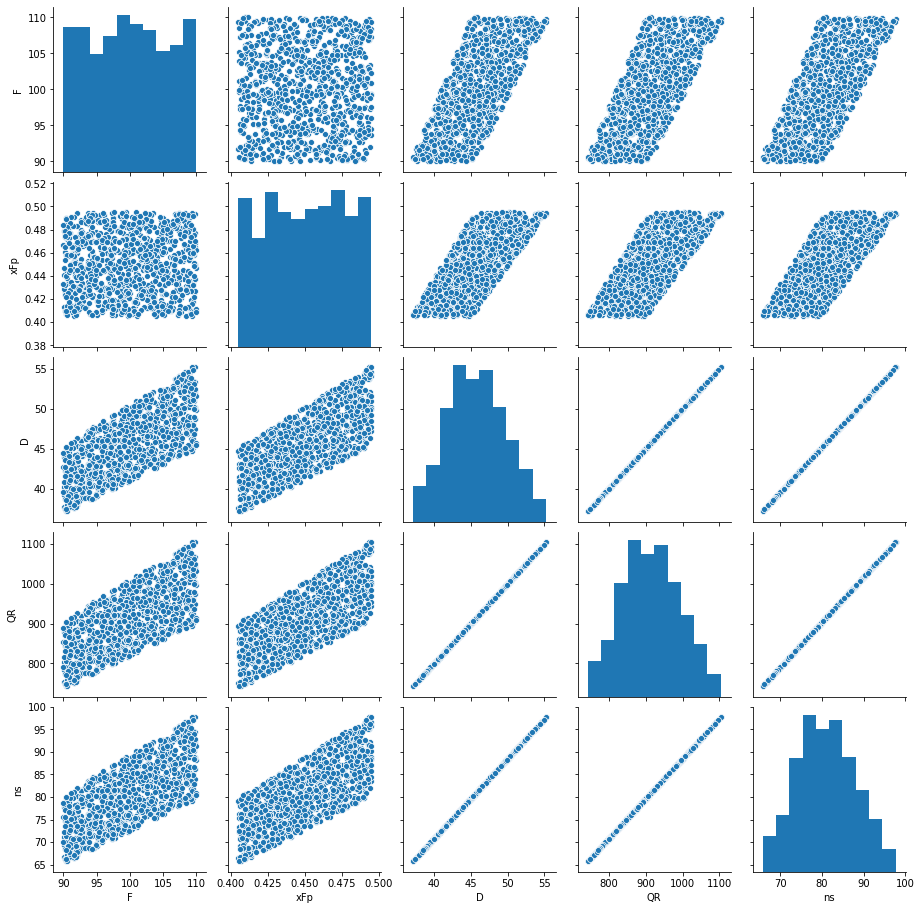

In [10]:
sns.pairplot(df)

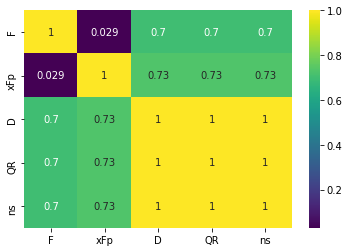

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [12]:
df = df.drop(['D', 'QR'], axis = 1)

In [13]:
df.head()

,F,xFp,ns
0,107.016682,0.458847,88.340009
1,97.254479,0.455013,79.580250
2,90.535471,0.471967,76.969521
3,92.487194,0.477318,79.559739
4,94.980174,0.439849,75.009987


## 6. Data Preparation



In [14]:
X = df.drop('ns', axis = 1)
y = df['ns']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 7. Machine Learning Model Development



In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Regression coefficient for Feed Flowrate (F): ', lm.coef_[0])
print('Regression coefficient for Feed Composition (xFp): ', lm.coef_[1])
print('Intercept: ', lm.intercept_)

Regression coefficient for Feed Flowrate (F):  4.713717814014511
Regression coefficient for Feed Composition (xFp):  4.881418408674419
Intercept:  80.92004462892642


In [19]:
predictions = lm.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

r2_score = round(r2_score(y_test, predictions), 3)
mae = round(mean_absolute_error(y_test, predictions), 3)

print('R2 Score: ', r2_score)
print('MAE (kmol/h): ', mae)

R2 Score:  0.998
MAE (kmol/h):  0.209


## 8. Conclusion



## 9. References

